Utilizada para quando temos muitos dados e problemas complexos.

O que a rede neural aprende é o melhor conjunto de pesos para uma base de dados (basicamente por tentativa e erro).

Na rede neural de uma camada, é feito o produto do valor de entrada pelo peso e isso passa por uma função de ativação. Um exemplo de função de ativação é a função step, em que valores menores que um resulta em 0 e valores maiores ou iguais a um, resulta em 1.

As redes neurais mais utilizadas para problemas reais são multicamadas (multilayer perceptron).

**Funções de ativação:** step (assume apenas os valores 0 e 1); função sigmoide (assume valores entre 0 e 1); hiberbólica (assume valores entre -1 e 1).


**Algoritmo:** inicializo os pesos (aleatório ou por algum método), calculo as saídas, calculo o erro, calcula os novos pesos, atualiza os pesos, e calculo as saídas novamente. Paro quando o erro for pequeno.

Objetivo é encontrar a combinação de pesos que o erro é o menor possível. Gradiente é calculado para saber **quanto** ajustar os pesos.

**Parâmetros:**
- Taxa de aprendizagem: define o quão rápido o algoritmo vai aprender (valor adicionado aos pesos). Se for muito alta, convergência rápida, porém mais chance de cair no mínimo local.
- Momento: objetivo é escapar dos mínimos locais

# Importação das bibliotecas básicas

In [ ]:
!pip -q install plotly

In [ ]:
!pip -q install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Redes neurais artificiais

In [ ]:
from sklearn.neural_network import MLPClassifier

## Base credit data - 99.80%

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
# Com o verbose, o algoritmo mostra o valor de erro para cada nova iteração

# Precisamos configurar apenas as camadas ocultas, nao as de entrada, nem as de saída
# (3 + 1) / 2 = 2
# 3 de entrada, duas camadas ocultas de 2 neuronios, e uma cama de saída
# 3 -> 2 -> 2 -> 1
rede_neural_credit = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
rede_neural_credit.fit(X_credit_treinamento, y_credit_treinamento)

Iteration 1, loss = 0.85607662
Iteration 2, loss = 0.78382610
Iteration 3, loss = 0.72310091
Iteration 4, loss = 0.67423309
Iteration 5, loss = 0.63301169
Iteration 6, loss = 0.59846906
Iteration 7, loss = 0.56842550
Iteration 8, loss = 0.54155626
Iteration 9, loss = 0.51567532
Iteration 10, loss = 0.49054534
Iteration 11, loss = 0.46605755
Iteration 12, loss = 0.44212872
Iteration 13, loss = 0.41763575
Iteration 14, loss = 0.39276704
Iteration 15, loss = 0.36781483
Iteration 16, loss = 0.34171227
Iteration 17, loss = 0.31697036
Iteration 18, loss = 0.29427505
Iteration 19, loss = 0.27388127
Iteration 20, loss = 0.25577627
Iteration 21, loss = 0.23985665
Iteration 22, loss = 0.22569550
Iteration 23, loss = 0.21313967
Iteration 24, loss = 0.20217244
Iteration 25, loss = 0.19209948
Iteration 26, loss = 0.18316562
Iteration 27, loss = 0.17519267
Iteration 28, loss = 0.16814361
Iteration 29, loss = 0.16169590
Iteration 30, loss = 0.15598472
Iteration 31, loss = 0.15081645
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1500, tol=1e-05,
              verbose=True)

In [ ]:
previsoes = rede_neural_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.996

0.996

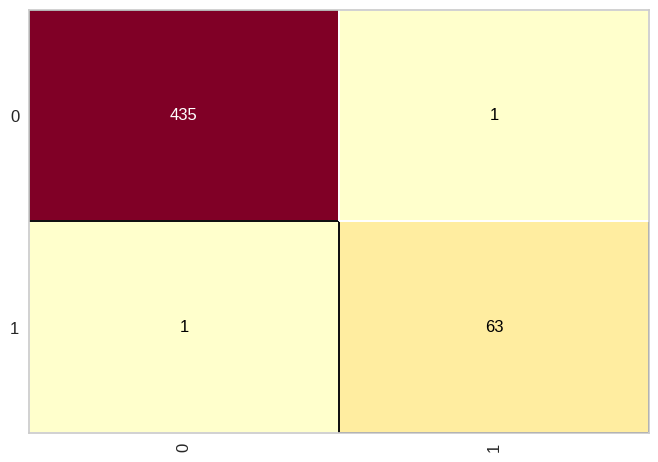

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       0.98      0.98      0.98        64

    accuracy                           1.00       500
   macro avg       0.99      0.99      0.99       500
weighted avg       1.00      1.00      1.00       500

